## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [3]:
nc = pd.read_csv("nc (1).csv")

In [4]:
nc.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [ ]:
# Box plot of mothers habit and weigh

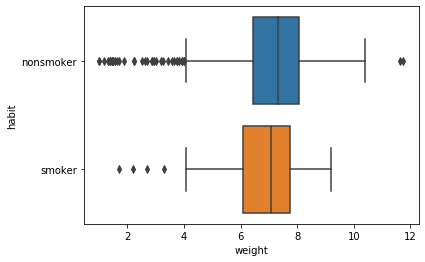

In [11]:
sns.boxplot(x="weight",y="habit",data=nc)

From the plot it shows that non-smokers are more weighty than smokers 

# write hypothesis to test if the average weight of  children born by smoking_mothers are different from those born to non-smoking mothers

**Population**: Weights of babies born to smoking or non_smoking in the NC data

**Parameter of interest**:$\mu_1 - \mu_2$, average age

**Null Hypothesis**: $\mu_1 = \mu_2$

**Alternate Hypothesis**: $\mu_1 \neq \mu_2$



# Conducting a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers

**Population**: Weights of mothers in NC data

**Parameters of interest**: $\mu_1 - \mu_2$, Weight

**Null Hypothesis**: $\mu_1 = \mu_2$

**Alternative Hypothesis**: $\mu_1 \neq \mu_2$


In [31]:
young_mothers = nc[nc['mature']=='younger mom']
mature_mothers = nc[nc["mature"]=="mature mom"]
print("Number of younger mothers = {}".format(len(young_mothers)))
print("mean weight of younger mothers = {}".format(round(young_mothers["gained"].mean()),1))
print("standard deviation of younger mothers weight ={}".format(round(young_mothers["gained"].std(),1)))
print("Number of mature mothers = {}".format(len(mature_mothers)))
print("Mean weight of maure mothers = {}".format(round(mature_mothers["gained"].mean(),1)))
print("standard deviation of mature mothers weight = {}".format(round(mature_mothers["gained"].std(),1)))
print("Difference between mean weights of mature and young mothers = {}".format(mature_mothers["gained"].mean()-mature_mothers["gained"].mean()))

Number of younger mothers = 867
mean weight of younger mothers = 31
standard deviation of younger mothers weight =14.3
Number of mature mothers = 133
Mean weight of maure mothers = 28.8
standard deviation of mature mothers weight = 13.5
Difference between mean weights of mature and young mothers = 0.0


From here could see that $\mu_1 - \mu_2$ = 0, that means both mean weights are the same but we don't know if they are statistically the same. We will need to perform a two_tail z test, since we have a large sample and also we are testing for equality or none equality at a 95% confidence interval

In [35]:
sm.stats.ztest(young_mothers["gained"].dropna(),mature_mothers["gained"].dropna(),alternative="two-sided")

(1.3150120052394427, 0.18850586777828726)

## Conclusion 

Since the p_values is greater then 0.05 we can confidently reject the null hypothesis and accept the null_hypothesis, hence the average weight gained by mature women is the same as that of younger mom

# Constructing a confidence interval for the difference between the weights of babies born to smoking & non-smoking mothers

In [38]:
smoking_mothers = nc[nc["habit"]=="smoker"]
non_smoking_mothers = nc[nc["habit"]!="smoker"]
smoking_mothers.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
14,21.0,16,younger mom,38.0,full term,15.0,married,75.0,7.56,not low,female,smoker,white
15,NaN,16,younger mom,40.0,full term,7.0,married,35.0,6.88,not low,male,smoker,white
16,14.0,16,younger mom,40.0,full term,12.0,married,9.0,5.81,not low,female,smoker,white
30,NaN,17,younger mom,42.0,full term,8.0,married,72.0,7.44,not low,male,smoker,white
65,24.0,18,younger mom,40.0,full term,14.0,not married,47.0,7.06,not low,female,smoker,white


In [39]:
non_smoking_mothers.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [48]:
# mean weight of smoking mothers babies
print(round(smoking_mothers["weight"].mean(),1))
# standard deviation of smoking mothers babies weight
print(round(smoking_mothers["weight"].std(),1))

6.8
1.4


In [50]:
# mean weight of non_smoking mothers  babies
print(round(non_smoking_mothers["weight"].mean(),1))
# standard deviation of non_smoking_mothers babies weight 
print(round(non_smoking_mothers["weight"].std(),1))

7.1
1.5


In [55]:
# difference between mean_weight of smoking mothers and non_smoking_mothers babaies weight
print(abs(round(smoking_mothers["weight"].mean()-non_smoking_mothers["weight"].mean(),1)))

0.3


from the above we could see that $\mu_1 \neq \mu_2$, but we are not sure if it is statistically different, we are going to use a z_test two way test since we have a large dataset and we are testing for = or $\neq$ at a confidence interval of 95% or $\alpha$ at 0.05

In [56]:
sm.stats.ztest(smoking_mothers["weight"],non_smoking_mothers["weight"],alternative="two-sided")

(-2.170627782209565, 0.029959320237758266)

## Conclusion

Since our p_value is less than 0.05 we will reject the null_hypothesis and accept the alternative hypothesis which states that there is a difference in the average weight of children born by smoking mothers and children born by non_smoking mothers